# Desafio - EXPANSÃO DE UMA REDE DE LABORATÓRIOS

# 1. Introdução

## 1.1. Cenário

A medicina diagnóstica tem um papel
fundamental na jornada de atendimento dos
pacientes de qualquer sistema de saúde em
qualquer lugar do mundo, sendo somente
nos EUA um mercado de aproximadamente
106 bilhões de dólarers com mais de 40 mil
laboratórios, empregando mais de 680 mil
funcionários segundo a ACLA.

## 1.2. Problema

Diante desse cenário, o desafio proposto tem
como objetivo auxiliar a área de negócios
de uma rede norte americana de medicina
diagnóstica a ter insumos iniciais para suportar
seu plano de expansão da rede de laboratórios.

Sabe-se que não é possível ou é bem difícil
gerar demanda e fazer ofertas neste tipo de
mercado, entretanto é muito interessante e
rentável fidelizar o cliente para que ele sempre
visite a rede quando surgir a necessidade.

## 1.3. Objetivo

Apresentar e justificar a escolha de TRÊS ZIP CODES para a
instalação dos novos laboratórios da rede.

## 1.4. Definição caminhos de abordagem

Para definir os caminhos de abordagem para o problema em questão,
é necessário o entendimento do problema e objetivo do desafio.
Será fundamental a definição de métricas para avaliar cada
laboratório levando em consideração diversos fatores que
justificarão a decisão final de escolha dos três laboratórios da rede.
Os tipos de fatores que serão considerados serão:

* Histórico
* Econômico
* Logístico
* Demográfico
* Geográfico

# 2. Coleta dos dados

Importante: Os dados não estão no repositório do Github, porque excede o limite de dados armazenados permitido.

In [214]:
# Importando as bibliotecas
import pandas as pd

In [215]:
df_geo = pd.read_csv("data/df_geocode.csv", index_col=0)
df_geo.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [216]:
df_exames = pd.read_csv("data/transactional_data.csv", delimiter=";")
df_exames.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [217]:
df_exames.dtypes

Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab Id             object
CodItem             int64
Testing Cost       object
dtype: object

In [218]:
df_info_exames = pd.read_csv("data/test_data.csv")
df_info_exames.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [219]:
df_info_exames.dtypes

CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

In [220]:
df_demographic = pd.read_csv("data/DemographicData_ZCTAs.csv", index_col=0)
df_demographic.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [221]:
df_demographic.dtypes

Id                                  object
GeographicAreaName                  object
TotalPopulation                      int64
SexRatio(males per 100 females)    float64
Population_Under5Years               int64
Population_5to9Years                 int64
Population_10to14Years               int64
Population_15to19Years               int64
Population_20to24Years               int64
Population_25to34Years               int64
Population_35to44Years               int64
Population_45to54Years               int64
Population_55to59Years               int64
Population_60to64Years               int64
Population_65to74Years               int64
Population_75to84Years               int64
Population_85YearsAndOver            int64
MedianAgeInYears                   float64
dtype: object

In [222]:
df_economic = pd.read_csv("data/EconomicData_ZCTAs.csv", index_col=0)
df_economic.head()

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [223]:
df_economic.dtypes

id                                    object
Geographic Area Name                  object
TotalHouseholds_LessThan$10.000        int64
TotalHouseholds_$10.000to$14.999       int64
TotalHouseholds_$15.000to$24.999       int64
TotalHouseholds_$25.000to$34.999       int64
TotalHouseholds_$35.000to$49.999       int64
TotalHouseholds_$50.000to$74.999       int64
TotalHouseholds_$75.000to$99.999       int64
TotalHouseholds_$100.000to$149.999     int64
TotalHouseholds_$150.000to$199.999     int64
TotalHouseholds_$200.000OrMore         int64
dtype: object

# 2. Tratamento dos dados

In [224]:
df_geo.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [225]:
df_geo.dtypes

Lab Id       object
Address      object
Location     object
Zipcode     float64
dtype: object

In [226]:
df_geo.isnull().sum()

Lab Id      0
Address     0
Location    0
Zipcode     1
dtype: int64

In [227]:
df_geo = df_geo.dropna(axis=0)

In [228]:
df = df_geo[["Zipcode", "Lab Id", "Address"]]
df.head()

,Zipcode,Lab Id,Address
0,30096.0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096"
1,13440.0,L520,"1614 N JAMES ST, ROME, NY 13440"
2,98034.0,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034"
3,30342.0,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342"
4,61469.0,L545,"1204 IL HWY 164, OQUAWKA, IL 61469"


In [229]:
# Separar a coluna Location em duas Colunas de Latitude e Longitude
lat = []
lon = []
for location in df_geo["Location"]:
    lat_lon = location.split(",")
    lat.append(float(lat_lon[0]))
    lon.append(float(lat_lon[1]))
df["Lat"] = lat
df["Lon"] = lon
df.head()

,Zipcode,Lab Id,Address,Lat,Lon
0,30096.0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096",34.000319,-84.162972
1,13440.0,L520,"1614 N JAMES ST, ROME, NY 13440",43.231133,-75.444536
2,98034.0,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034",47.716279,-122.183815
3,30342.0,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342",33.909388,-84.352910
4,61469.0,L545,"1204 IL HWY 164, OQUAWKA, IL 61469",40.930993,-90.943760


In [230]:
df_exames.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [231]:
df_exames["Gender"].unique()

array(['F', 'M', 'I'], dtype=object)

In [232]:
testing_costs = []
for cost in df_exames["Testing Cost"]:
    testing_costs.append(float(cost.replace(',', '.')))
df_exames["Testing Cost"] = testing_costs

# Calcular o valor total para cada laboratório
df_exames_total = df_exames.groupby('Lab Id')['Testing Cost'].sum()

# Calcular o número de exames para cada laboratório
df_exames_count = df_exames.groupby('Lab Id')['Testing Cost'].count()

# Calcular o ticket médio para cada laboratório
df_exames_mean = df_exames.groupby('Lab Id')['Testing Cost'].mean()

# Calcular o número de exames para mulheres
df_exames_mulheres = df_exames[df_exames["Gender"] == "F"].groupby('Lab Id')['Gender'].count()

# Calcular o número de exames para homens
df_exames_homens = df_exames[df_exames["Gender"] == "M"].groupby('Lab Id')['Gender'].count()

# Juntar os resultados em um único dataframe
df_resultado = pd.concat([df_exames_total, df_exames_count, df_exames_mean, df_exames_mulheres, df_exames_homens], axis=1)
df_resultado.columns = ['Faturamento', 'Número de Exames', 'Ticket Médio', "Número de Exames para Mulheres", "Número de Exames para Homens"]

# Juntar com o dataframe dos laboratórios
df = df.merge(df_resultado, left_on='Lab Id', right_index=True)
df[["Zipcode", "Lab Id", "Faturamento", "Número de Exames", "Ticket Médio", "Número de Exames para Mulheres", "Número de Exames para Homens"]].head()

,Zipcode,Lab Id,Faturamento,Número de Exames,Ticket Médio,Número de Exames para Mulheres,Número de Exames para Homens
0,30096.0,L152,6259655.62,95878,65.287716,62275,33603
1,13440.0,L520,583036.96,20562,28.355071,12989,7573
2,98034.0,L141,2799052.10,51058,54.821029,35772,15286
3,30342.0,L524,367192.36,13257,27.697998,8253,5004
4,61469.0,L545,88457.00,2823,31.334396,1717,1106


# 3. Análise dos dados

In [233]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

## Distribuição geográfica dos laboratórios

[Text(0.5, 1.0, 'Distribuição geográfica dos clusters')]

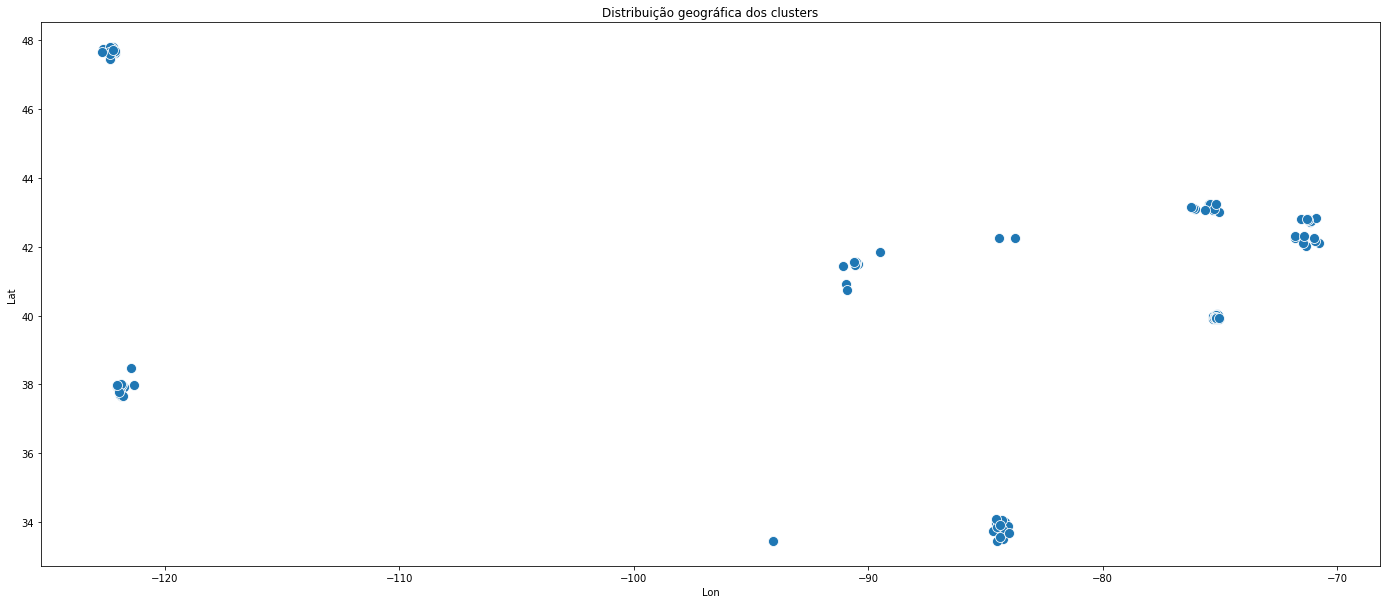

In [234]:
plt.figure(figsize=(24, 10))
geo = sns.scatterplot(data=df, x="Lon", y="Lat", s=100)
geo.set(title="Distribuição geográfica dos clusters")

* Pontos mais concentrados indicam laboratórios com grande grau de competitividade, possuem uma maior quantidade de clientes e um valor mais caro para os exames;
* Pontos menos concentrados indicam laboratórios com pequeno grau de competitividade, possuem uma menor quantidade de clientes e um valor mais barato para os exames.

## Ticket Médio x Número de Exames

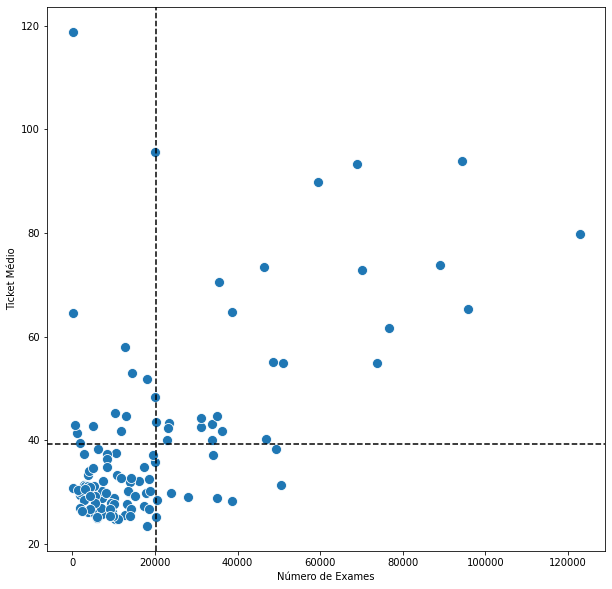

In [235]:
media_numero_exames = df["Número de Exames"].mean()
media_ticket_medio = df["Ticket Médio"].mean()
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="Número de Exames", y="Ticket Médio", s=100)
plt.axhline(media_ticket_medio, 0, 1, color="black", **{"ls": "--"})
plt.axvline(media_numero_exames, 0, 1, color="black", **{"ls": "--"})

O gráfico é dividido em quatro áreas com características distintas:
* Superior direito: Possuem um alto ticket médio e um alto número de exames (Ótimo);
* Superior esquerdo: Possuem um alto ticket médio e um baixo número de exames (Bom);
* Inferior direito: Possuem um baixo ticket médio e um alto número de exames (Bom);
* Inferior esquerdo: Possuem um baixo ticket médio e um baixo número de exames (Ruim).

## Número de Exames para Mulheres e Homens

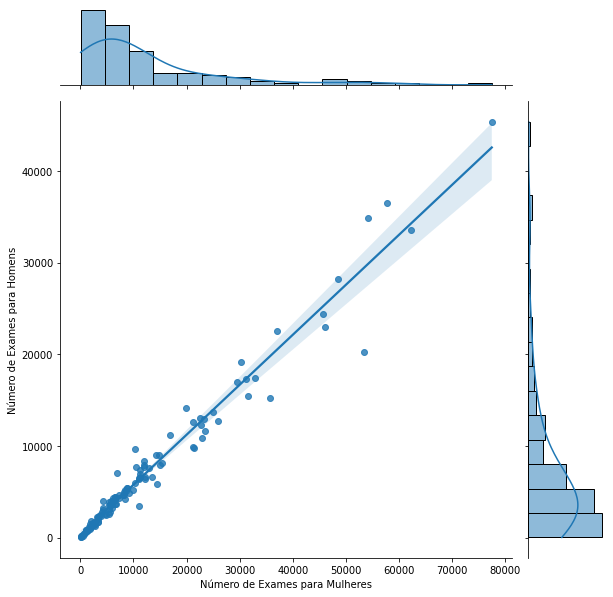

In [236]:
sns.jointplot(data=df, x="Número de Exames para Mulheres", y="Número de Exames para Homens", kind="reg", height=8.4)

* Identificação de um padrão de comportamento da proporção de exames para mulheres e para homens
* Existindo uma tendência para uma maior quantidade de mulheres realizando os exames do que homens